✅ 설치 완료!

🚀 퀀트 트레이딩 시스템 시작 (주말 대응)
📅 오늘: 토요일 → 2026-02-13 (금) 데이터 사용
🔍 20260213 데이터 확인중...
✅ 20260213 데이터 있음!

📊 20260213 기준 코스피 데이터 수집중...
📋 전체 종목 수: 950개
  진행중: 50/800 종목
  진행중: 100/800 종목
  진행중: 150/800 종목
  진행중: 200/800 종목
  진행중: 250/800 종목
  진행중: 300/800 종목
  진행중: 350/800 종목
  진행중: 400/800 종목
  진행중: 450/800 종목
  진행중: 500/800 종목
  진행중: 550/800 종목
  진행중: 600/800 종목
  진행중: 650/800 종목
  진행중: 700/800 종목
  진행중: 750/800 종목
  진행중: 800/800 종목

✅ 476개 종목 수집 완료!
⏱️ 데이터 수집 시간: 264.8초

📊 데이터 통계:
PER 평균: 16.36, 중앙값: 11.06
PBR 평균: 1.08, 중앙값: 0.67

🏆 저PER + 저PBR TOP 10 추천 종목 (점수 높을수록 저평가)
      종목  PER  PBR     점수
 KC그린홀딩스 0.46 0.11 -0.340
      서원 1.20 0.39 -0.990
    태원물산 1.30 0.50 -1.150
      서연 1.75 0.29 -1.165
   무림페이퍼 2.01 0.18 -1.185
     NPC 2.07 0.34 -1.375
STX그린로지스 1.68 0.55 -1.390
    동국씨엠 2.64 0.17 -1.490
    삼정펄프 2.33 0.34 -1.505
      우성 2.55 0.25 -1.525

📌 점수 해석: 높을수록 저평가 (1등 점수: -0.34)

🏆 PER만 보는 전략 TOP 10 추천 종목 (점수 높을수록 저평가)
      종목  PER  PBR    점수
  DH오토넥스 0.35 4.66 -0.35
 KC그

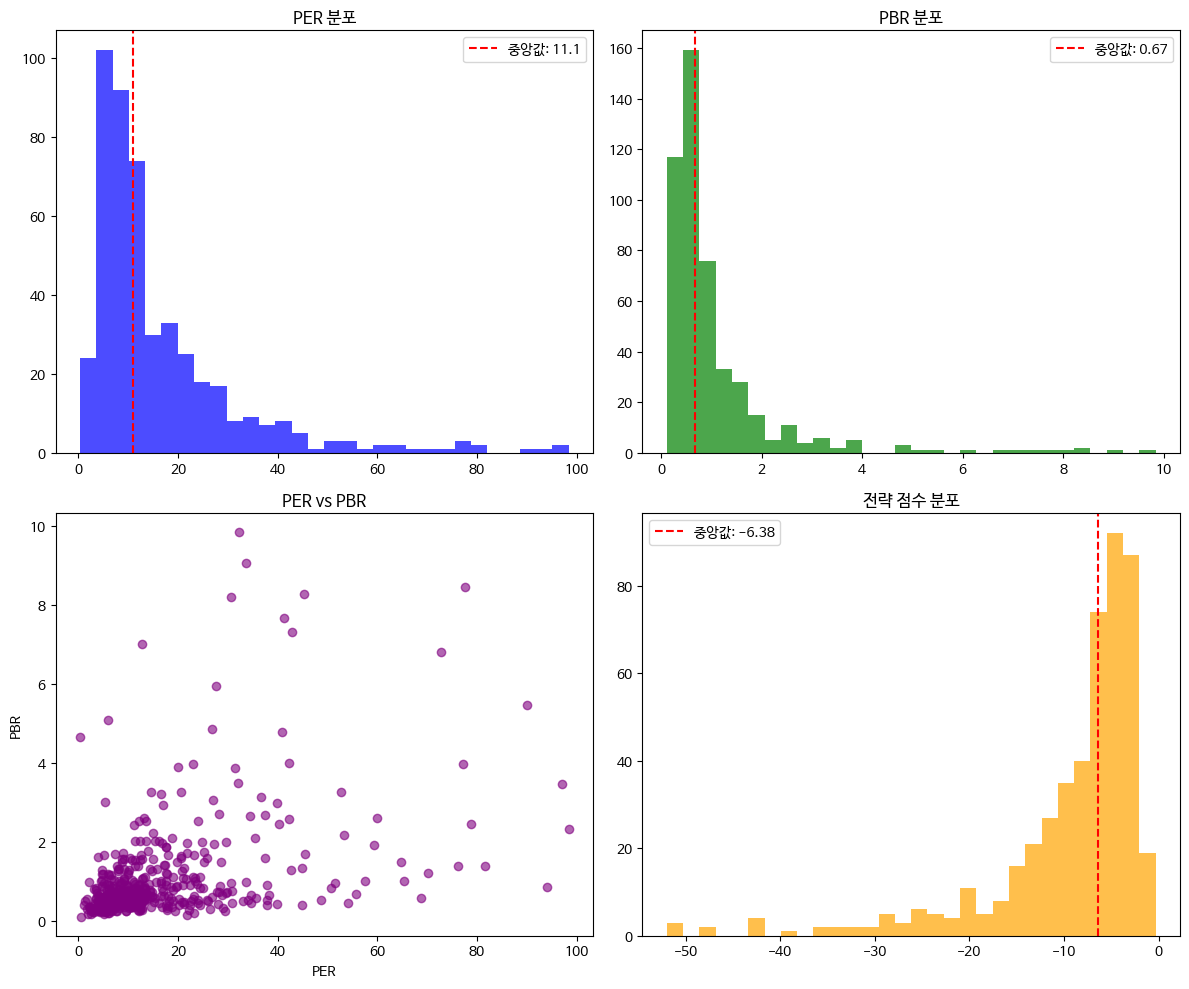


✅ 476개 종목 수집 완료!


In [ ]:
# 1. 설치
!pip install pykrx finance-datareader -q

# 2. 임포트 (timedelta 포함!)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta  # ✅ 이 부분 중요!
import time # Already imported here
from pykrx import stock

print("✅ 설치 완료!")

# ============================================================
# 날짜 관련 함수
# ============================================================
def get_last_business_day():
    today = datetime.today()
    weekday = today.weekday()

    if weekday == 5:  # 토요일
        last_bd = today - timedelta(days=1)
        print(f"📅 오늘: 토요일 → {last_bd.strftime('%Y-%m-%d')} (금) 데이터 사용")
    elif weekday == 6:  # 일요일
        last_bd = today - timedelta(days=2)
        print(f"📅 오늘: 일요일 → {last_bd.strftime('%Y-%m-%d')} (금) 데이터 사용")
    else:  # 평일
        last_bd = today
        print(f"📅 오늘: 평일 → {last_bd.strftime('%Y-%m-%d')} 데이터 사용")

    return last_bd.strftime('%Y%m%d')

def check_date_data(date_str):
    try:
        tickers = stock.get_market_ticker_list(date_str, market="KOSPI")
        if len(tickers) > 0:
            df_test = stock.get_market_fundamental(date_str, date_str, tickers[0])
            if not df_test.empty:
                return True
        return False
    except:
        return False

def get_valid_date():
    date = get_last_business_day()
    print(f"🔍 {date} 데이터 확인중...")

    if check_date_data(date):
        print(f"✅ {date} 데이터 있음!")
        return date

    # 5일 전까지 검색
    print("🔄 데이터 없음. 이전 날짜 검색중...")
    current = datetime.strptime(date, '%Y%m%d')
    for i in range(1, 6):
        prev = current - timedelta(days=i)
        prev_str = prev.strftime('%Y%m%d')

        # 주말 건너뛰기
        if prev.weekday() >= 5:
            continue

        print(f"  📅 {prev_str} 확인중...")
        if check_date_data(prev_str):
            print(f"  ✅ {prev_str} 데이터 찾음!")
            return prev_str

    print("❌ 최근 5일 내 데이터 없음")
    return None

# ============================================================
# 데이터 수집 함수
# ============================================================
def get_kospi_data(n_stocks=100):
    valid_date = get_valid_date()

    if valid_date is None:
        print("\n⚠️ 실제 데이터 없음. 샘플 데이터 사용")
        return pd.DataFrame({
            '종목': ['삼성전자', 'SK하이닉스', 'NAVER', '카카오', '현대차', '기아',
                    'LG전자', 'POSCO', '셀트리온', 'KB금융'],
            'PER': [12.3, 10.2, 19.8, 111.9, 8.5, 7.2, 15.4, 9.8, 25.6, 6.5],
            'PBR': [0.85, 1.10, 1.42, 2.45, 0.52, 0.48, 0.76, 0.63, 2.10, 0.41]
        })

    print(f"\n📊 {valid_date} 기준 코스피 데이터 수집중...")
    tickers = stock.get_market_ticker_list(valid_date, market="KOSPI")
    print(f"📋 전체 종목 수: {len(tickers)}개")

    results = []
    for i, ticker in enumerate(tickers[:n_stocks]):
        name = stock.get_market_ticker_name(ticker)
        try:
            df = stock.get_market_fundamental(valid_date, valid_date, ticker)
            if not df.empty:
                # 컬럼명 확인
                if 'PER' in df.columns and 'PBR' in df.columns:
                    per = df['PER'].iloc[0]
                    pbr = df['PBR'].iloc[0]

                    if per > 0 and pbr > 0 and per < 100 and pbr < 10:
                        results.append({
                            '종목': name,
                            'PER': float(per),
                            'PBR': float(pbr)
                        })
        except:
            pass

        if (i+1) % 50 == 0:
            print(f"  진행중: {i+1}/{n_stocks} 종목")

        time.sleep(0.05)

    df_result = pd.DataFrame(results)
    print(f"\n✅ {len(df_result)}개 종목 수집 완료!")
    return df_result

# ============================================================
# 전략 함수 (수정 완료!)
# ============================================================
def run_strategy(df, wp_per=-0.5, wp_pbr=-1.0, name="전략"):
    """
    저평가주 찾기 전략
    - PER, PBR이 낮을수록 좋음 → 가중치 음수
    - 점수가 높을수록 저평가!
    """
    if len(df) == 0:
        print("❌ 데이터 없음")
        return df

    df = df.copy()

    # 점수 계산 (가중치 음수)
    df['점수'] = df['PER'] * wp_per + df['PBR'] * wp_pbr

    # 🔥 중요: 점수가 높은 순으로 정렬 (ascending=False)
    df_sorted = df.sort_values('점수', ascending=False)

    print(f"\n{'='*60}")
    print(f"🏆 {name} TOP 10 추천 종목 (점수 높을수록 저평가)")
    print('='*60)
    print(df_sorted[['종목', 'PER', 'PBR', '점수']].head(10).to_string(index=False))

    # 점수 해석 설명 추가
    print(f"\n📌 점수 해석: 높을수록 저평가 (1등 점수: {df_sorted.iloc[0]['점수']:.2f})")

    return df_sorted

# ============================================================
# 실행
# ============================================================
print("\n" + "="*60)
print("🚀 퀀트 트레이딩 시스템 시작 (주말 대응)")
print("="*60)

# 데이터 수집
start_time = time.time() # Measure time for data collection
df = get_kospi_data(n_stocks=800)
end_time = time.time()
print(f"⏱️ 데이터 수집 시간: {end_time - start_time:.1f}초")


if len(df) > 0:
    print(f"\n📊 데이터 통계:")
    print(f"PER 평균: {df['PER'].mean():.2f}, 중앙값: {df['PER'].median():.2f}")
    print(f"PBR 평균: {df['PBR'].mean():.2f}, 중앙값: {df['PBR'].median():.2f}")

    # 여러 전략 테스트
    result1 = run_strategy(df, wp_per=-0.5, wp_pbr=-1.0, name="저PER + 저PBR")
    result2 = run_strategy(df, wp_per=-1.0, wp_pbr=0, name="PER만 보는 전략")
    result3 = run_strategy(df, wp_per=0, wp_pbr=-1.0, name="PBR만 보는 전략")

    # 시각화
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    axes[0,0].hist(df['PER'], bins=30, alpha=0.7, color='blue')
    axes[0,0].set_title('PER 분포')
    axes[0,0].axvline(df['PER'].median(), color='red', linestyle='--',
                      label=f'중앙값: {df["PER"].median():.1f}')
    axes[0,0].legend()

    axes[0,1].hist(df['PBR'], bins=30, alpha=0.7, color='green')
    axes[0,1].set_title('PBR 분포')
    axes[0,1].axvline(df['PBR'].median(), color='red', linestyle='--',
                      label=f'중앙값: {df["PBR"].median():.2f}')
    axes[0,1].legend()

    axes[1,0].scatter(df['PER'], df['PBR'], alpha=0.6, c='purple')
    axes[1,0].set_xlabel('PER')
    axes[1,0].set_ylabel('PBR')
    axes[1,0].set_title('PER vs PBR')

    axes[1,1].hist(result1['점수'], bins=30, alpha=0.7, color='orange')
    axes[1,1].set_title('전략 점수 분포')
    axes[1,1].axvline(result1['점수'].median(), color='red', linestyle='--',
                     label=f'중앙값: {result1["점수"].median():.2f}')
    axes[1,1].legend()

    plt.tight_layout()
    plt.show()

    # Corrected variable reference: df instead of df_800
    print(f"\n✅ {len(df)}개 종목 수집 완료!")
else:
    print("\n❌ 데이터 수집 실패")
    # Removed the redundant import time and incorrect time measurement block
    # The time measurement for get_kospi_data is now done above, unconditionally.
